In [3]:
%load_ext autoreload
%matplotlib inline  
%reload_ext autoreload
__author__ = 'ewan'
import numpy as np
import sys
sys.path.append("../src/") 
import matplotlib.pyplot as plt
import WindFarm as wf # Fusedwake wind farm model from JUAN
import WindTurbine as wt # Fusedwake wind turbine model from JUAN
import pandas as pd
from DWM_GClarsenPicks import get_Rw
from DWM_misc import LoadOutputs, my_rolling_deg

print '************* Post process wind farm efficiency ***************** '

WTG='NY2'
# WS = 9.0;TI = 0.06;WTcoord='Lill_coordinates.dat'; WTspec='LillgrundEfficiency.dat'; HH=65.0; R=46.5; stab='N'
WS = 9.0;TI = 0.06;WTcoord='../data/Lill_full.dat'; WTspec='../WT-data/'+WTG+'/'+WTG+'_PC.dat'; HH=65.0; R=46.5; stab='N';
WT = wt.WindTurbine('Siemens 2.3MW 93m offshore',WTspec,65,46.5)
#WT = wt.WindTurbine('NREL 5 MW','NREL_5MW.dat',90,63.0)
WF = wf.WindFarm('Lillgrund',WTcoord,WT)
vWD = np.arange(0.,360.,1)

# Dominant wake superposition
# folder='outputs/DominantBEMinlet'   
folder='../data/LillgrundEfficiency/sDWM/Dominant'    
powers, ref_powers = LoadOutputs(folder,vWD,WF,WS,TI)
powers_dominant=sum(powers)
dwm_dominant= pd.DataFrame({'wd':vWD, 'power':powers_dominant})
# nom_power=1364.55
nom_power=WT.get_P(WS)
dwm_dominant['eff'] = dwm_dominant['power'] / (nom_power * WF.nWT)


# Quadratic wake superposition
# folder='outputs/QuadraticBEMinlet'
folder='../data/LillgrundEfficiency/sDWM/Quadratic'  
powers, ref_powers = LoadOutputs(folder,vWD,WF,WS,TI)
powers_quadratic=sum(powers)
dwm_quadratic= pd.DataFrame({'wd':vWD, 'power':powers_quadratic})
dwm_quadratic['eff'] = dwm_quadratic['power'] / (nom_power* WF.nWT)
# nom_power=1364.55*1000

# Linear wake superposition
folder='../data/LillgrundEfficiency/sDWM/Linear'
powers, ref_powers = LoadOutputs(folder,vWD,WF,WS,TI)
powers_linear=sum(powers)
dwm_linear= pd.DataFrame({'wd':vWD, 'power':powers_linear})
dwm_linear['eff'] = dwm_linear['power'] / (nom_power * WF.nWT)
# nom_power=1364.55*1000

# Bug in some wind directions
# print vWD[dwm_dominant['eff']>1]
# print vWD[dwm_quadratic['eff']>1]
# print vWD[dwm_linear['eff']>1]

# # Evt discard erroneous bins for plot
# dwm_dominant['eff'][dwm_dominant['eff']>1]=np.nan
# efficiency_quadratic[efficiency_quadratic>1]=np.nan


## NEED TO APPLY A 3DEG MOVING AVERAGE TO THE RESULTS
# Meas. by Kurt
df_data = pd.read_csv('../data/LillgrundEfficiency/Meas-Kurt/efficiency.dat', sep= '\s*', engine= 'python')
df_data['eff'] /= 100.

# Perform rolling average Gaumont et al.
dwm_dominant_avg = my_rolling_deg(dwm_dominant,dwd=3.)
dwm_quadratic_avg = my_rolling_deg(dwm_quadratic,dwd=3.)
dwm_linear_avg = my_rolling_deg(dwm_linear,dwd=3.)







The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
************* Post process wind farm efficiency ***************** 


In [4]:
gcl=np.load('../data/LillgrundEfficiency/Multifidelity-pire/df_gcl_avg.npy')
noj=np.load('../data/LillgrundEfficiency/Multifidelity-pire/df_noj_avg.npy')
rans=np.load('../data/LillgrundEfficiency/Multifidelity-pire/df_rans_avg.npy')

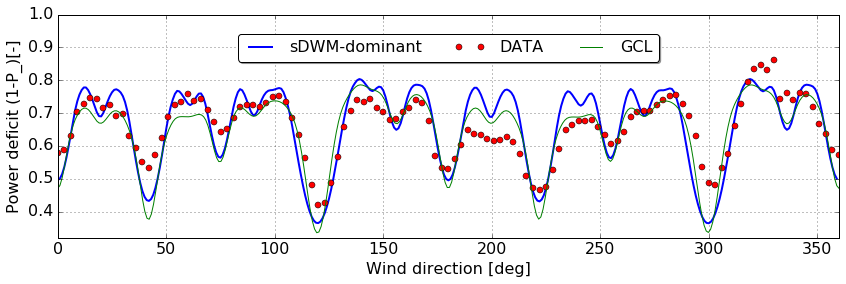

In [5]:
plt.figure(figsize=(14, 4))
# sdwm,=plt.plot(vWD,dwm_dominant['eff'],'b<',label='sDWM-dominant')
# plt.hold('True')
# sdwmq,=plt.plot(vWD,dwm_quadratic['eff'],'ko',label='sDWM-quadratic')
# sdwml,=plt.plot(vWD,dwm_linear['eff'],'g+',label='sDWM-linear')
sdwm,=plt.plot(dwm_dominant_avg['wd'],dwm_dominant_avg['eff'],'b-',linewidth=2,label='sDWM-dominant')
plt.hold('True')
# sdwmq,=plt.plot(dwm_quadratic_avg['wd'],dwm_quadratic_avg['eff'],'k-',label='sDWM-quadratic')
# sdwml,=plt.plot(vWD,dwm_linear_avg['eff'],'g+',label='sDWM-linear')
scada,=plt.plot(df_data['wd'],df_data['eff'],'ro',label='DATA',linewidth=2)
gclp,=plt.plot(gcl[:,1], gcl[:,0],'g-',label='GCL',linewidth=1)
# nojp,=plt.plot(noj[:,1], noj[:,0],'g-',label='NOJ',linewidth=1)
# ransp,=plt.plot(rans[:,1], rans[:,0],'y-',label='RANS',linewidth=1)
plt.ylim((0.32,1,))
# plt.ylim((0.,1.))
plt.xlim((0,360))
plt.grid('on')
plt.xlabel('Wind direction [deg]',fontsize=16)
plt.ylabel('Power deficit (1-P_)[-]',fontsize=16)
plt.tick_params(axis='both',labelsize=16)
# plt.title('Lillgrund farm production ')
# plt.legend(handles=[sdwm, sdwmq,sdwml, scada ],loc=4)
plt.legend(handles=[sdwm, scada, gclp],loc='upper center', bbox_to_anchor=(0.5, 0.95),
          fancybox=True, shadow=True, ncol=5,fontsize=16)
# plt.legend(handles=[sdwm, scada, gclp, nojp,ransp ],loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
# plt.savefig('Figs/windfarmefficiency.svg',bbox_inches='tight')
# plt.savefig('Figs/windfarmefficiency.png',bbox_inches='tight')
# plt.savefig('Figs/windfarmefficiency.pdf',bbox_inches='tight')

/home/ewan/Work/PostDoc/DWMstandalone/sDWM-WFC/venvDWMWFC/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


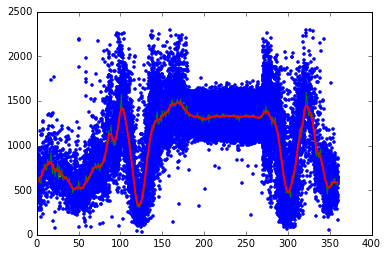

In [6]:
from scipy.stats import binned_statistic# Load the turbine C08 from SQL SCADA lillgrund
# scada=pd.read_csv('outputs/Efficiency/turbineC08scada.csv',names=['ws', 'wd', 'power'], header=0)
scada=pd.read_csv('../data/LillgrundEfficiency/Meas-Kurt/turbineC08scada.csv',names=['ws', 'wd', 'power'], header=0)
# print scada
scada=pd.DataFrame.sort(scada,'wd')
# scada=pd.DataFrame.drop_duplicates(scada,'wd')
# scada['wd']=(scada['wd']-90.)%360
bin_means = binned_statistic(scada['wd'], scada['power'], bins=360, range=(0, 359))[0]
scadabin= pd.DataFrame(np.vstack((vWD,bin_means)).T, columns=['wd', 'power'])
powers_scadaavg = my_rolling_deg(scadabin, x='wd', y='power',dwd=3.)
plt.figure()
plt.plot(scada['wd'],scada['power'],'b.')
plt.hold(True)
plt.plot(vWD,bin_means,'g-')
plt.plot(powers_scadaavg['wd'],powers_scadaavg['power'],'r-',linewidth=2)

In [7]:
## Dominant sDWM
folder='../data/LillgrundEfficiency/sDWM/Dominant'      
powers, ref_powers = LoadOutputs(folder,vWD,WF,WS,TI)
# print powers[22,:]
dwm_22= pd.DataFrame({'wd':vWD, 'power':powers[22,:]})
powers_avg = my_rolling_deg(dwm_22, x='wd', y='power',dwd=5.)
## Quadratic sDWM
folder='../data/LillgrundEfficiency/sDWM/Quadratic'       
powers, ref_powers = LoadOutputs(folder,vWD,WF,WS,TI)
# print powers[22,:]
dwm_q22= pd.DataFrame({'wd':vWD, 'power':powers[22,:]})
powers_qavg = my_rolling_deg(dwm_q22, x='wd', y='power',dwd=5.)

## Linear sDWM
folder='../data/LillgrundEfficiency/sDWM/Linear'   
powers, ref_powers = LoadOutputs(folder,vWD,WF,WS,TI)
# print powers[22,:]
dwm_l22= pd.DataFrame({'wd':vWD, 'power':powers[22,:]})
powers_lavg = my_rolling_deg(dwm_l22, x='wd', y='power',dwd=5.)

/home/ewan/Work/PostDoc/DWMstandalone/sDWM-WFC/venvDWMWFC/local/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


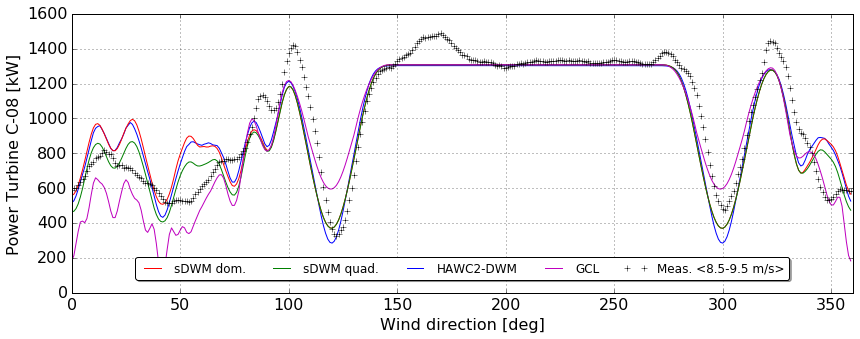

In [8]:
# Comparison with HAWC2DWM on turbine 22 (C08) not full polar
import numpy as np
y=np.load('../data/LillgrundEfficiency/HAWC2-DWM/polar9ms_free_Pe.npy')
y[:,0]=y[:,0]%360
y=y[y[:,0].argsort()]
# print y[y[:,0].argsort()]
gcl_powers=np.load('../data/LillgrundEfficiency/Multifidelity-pire/gcl_powers.npy')
# noj_powers=np.load('outputs/Efficiency/noj_powers.npy')
# print gcl_powers.shape
# print gcl_powers
plt.figure(figsize=(14, 5))
# hdwm,=plt.plot(dwm_hawc2[0][::-1]%360,dwm_hawc2[1][::-1],'bo',label='HAWC2-DWM')
hdwm,=plt.plot(y[:,0],y[:,1],'b-',label='HAWC2-DWM')
plt.hold('True')

# sdwmraw,=plt.plot(vWD,dwm_22['power'],'g-',label='sDWM-raw')
sdwm,=plt.plot(vWD,powers_avg['power'],'r-',linewidth=1,label='sDWM dom.')
sqdwm,=plt.plot(vWD,powers_qavg['power'],'g-',label='sDWM quad.')
# sldwm,=plt.plot(vWD,powers_lavg['power'],'k-',label='sDWM lin. - 5deg')
gclp,=plt.plot(vWD,gcl_powers[:,21],'m-',label='GCL')
# nojp,=plt.plot(vWD,noj_powers[:,21],'m-',label='GCL')
sscada,=plt.plot(powers_scadaavg['wd'],powers_scadaavg['power'],'k+',linewidth=2,label='Meas. <8.5-9.5 m/s>')
plt.xlim((0,360))
plt.grid('on')
plt.xlabel('Wind direction [deg]',fontsize=16)
plt.ylabel('Power Turbine C-08 [kW]',fontsize=16)
plt.tick_params(axis='both',labelsize=16)
# plt.legend(handles=[sdwmraw, sdwm, hdwm],loc=2)
# plt.legend(handles=[sdwmraw, sdwm, sqdwm, sldwm, hdwm, gclp, sscada],loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=5)
plt.legend(handles=[sdwm, sqdwm, hdwm, gclp, sscada],loc='upper center', bbox_to_anchor=(0.5, +0.15),
          fancybox=True, shadow=True, ncol=5)
# plt.title('C08-Lillgrund 9m/s 6%')
# plt.savefig('Figs/HAWC2DWMandFUSEDWINDDWM.png',bbox_inches='tight')
# plt.savefig('Figs/HAWC2DWMandFUSEDWINDDWM.pdf',bbox_inches='tight')



% sdwmdevdom= -2.99139015261
% sdwmqdevquad= -6.52114431469
% sdwmldevquad= -42.0900189135
% gcldev= -7.89380164977


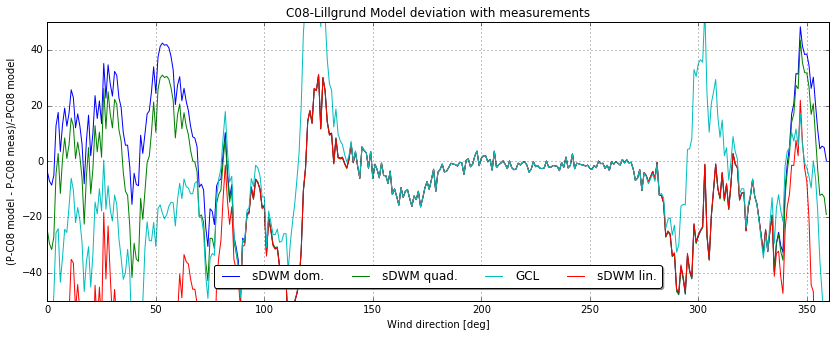

In [9]:
# Deviation in % for measurements
plt.figure(figsize=(14, 5))

sdwmdev,=plt.plot(vWD,100.*(powers_avg['power']-bin_means)/powers_avg['power'],label='sDWM dom.')
print '% sdwmdevdom=', np.mean(100.*(powers_avg['power']-bin_means)/powers_avg['power'])
plt.hold('True')
sdwmqdev,=plt.plot(vWD,100.*(powers_qavg['power']-bin_means)/powers_qavg['power'],label='sDWM quad.')
print '% sdwmqdevquad=', np.mean(100.*(powers_qavg['power']-bin_means)/powers_qavg['power'])
sdwmldev,=plt.plot(vWD,100.*(powers_lavg['power']-bin_means)/powers_lavg['power'],label='sDWM lin.')
print '% sdwmldevquad=', np.mean(100.*(powers_lavg['power']-bin_means)/powers_lavg['power'])
sgcldev,=plt.plot(vWD,100.*(gcl_powers[:,21]-bin_means)/powers_avg['power'],label='GCL')
print '% gcldev=', np.mean((100.*(gcl_powers[:,21]-bin_means)/powers_avg['power']))
plt.xlim((0,360))
plt.ylim((-50,50))
plt.grid('on')
plt.xlabel('Wind direction [deg]')
plt.ylabel('(P-C08 model - P-C08 meas)/-PC08 model')
plt.legend(handles=[sdwmdev, sdwmqdev, sgcldev, sdwmldev],loc='upper center', bbox_to_anchor=(0.5, +0.15),
          fancybox=True, shadow=True, ncol=5)
plt.title('C08-Lillgrund Model deviation with measurements')
# plt.savefig('Figs/HAWC2DWMandFUSEDWINDDWMdev.png')
# plt.savefig('Figs/HAWC2DWMandFUSEDWINDDWMdev.pdf')


In [11]:
## Animation
WTG='NY2'
WTcoord='../data/Lill_full.dat'; WTspec='../WT-data/'+WTG+'/'+WTG+'_PC.dat'; HH=65.0; R=46.5; stab='N';
WT = wt.WindTurbine('Siemens 2.3MW 93m offshore',WTspec,65,46.5)
WF = wf.WindFarm('Lillgrund','../data/Lill_full.dat',WT)

WS=9.0
TI=0.06
vWD = np.arange(0.,360.,1)

ID_waked=dict()
ID_waked = {str(iD): {str(iC) : []  for iC in range(WF.nWT) } for iD in range(0,len(vWD))}
ID_wakedspacing = {str(iD): {str(iC) : []  for iC in range(WF.nWT) } for iD in range(0,len(vWD))}
# for iD in range(0,len(vWD)):
#     ID_waked[str(iD)]=[]
#     for iC in range(WF.nWT):
#         ID_waked[str(iD)][str(iC)]=[]
        

for iD in range(0,len(vWD)):
    pars=[0.435449861,0.797853685,-0.124807893,0.136821858,15.6298,1.0]
    distFlowCoord, nDownstream, id0= WF.turbineDistance(vWD[iD])

    # Extreme wake to define WT's in each wake, including partial wakes
    ID_wake = {id0[i]:(get_Rw(x=distFlowCoord[0,id0[i],:],\
                              R=2*WF.WT.R,TI=TI,CT=WT.get_CT(WS),pars=pars)>\
               np.abs(distFlowCoord[1,id0[i],:])).nonzero()[0] \
               for i in range(WF.nWT)}



    for i in range(WF.nWT):
    # for i in range(1):
        cWT = id0[i]

        #Radial coordinates in cWT for wake affected WT's
        x=distFlowCoord[0,cWT,ID_wake[cWT]]
        C2C   = distFlowCoord[1,cWT,ID_wake[cWT]]

        index_orig=np.argsort(x)
        x=np.sort(x)
        row= ID_wake[id0[i]][index_orig]
        C2C=C2C[index_orig]
        for i_z in np.arange(0,len(x),1):
            ID_waked[str(iD)][str(row[i_z])].append(row[0])
            ID_wakedspacing[str(iD)][str(row[i_z])].append(x[-1])
            

% sdwmdevdom= -2.99139015261
% sdwmqdevquad= -6.52114431469
% sdwmldevquad= -42.0900189135
% gcldev= -7.89380164977


/home/ewan/Work/PostDoc/DWMstandalone/sDWM-WFC/venvDWMWFC/local/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


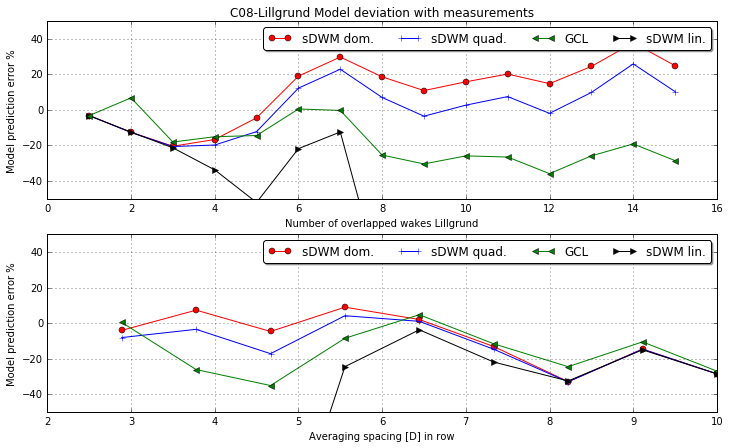

In [12]:
# print len(ID_waked['30']['22'])
# print ID_wakedspacing['30']['22']
# print ID_waked['30']['22']
nowake=np.zeros_like(vWD)
for iD in range(0,len(vWD)):
    nowake[iD]=len(ID_waked[str(int(vWD[iD]))]['22'])
lengthwake=np.zeros_like(vWD)
for iD in range(0,len(vWD)):
#     print np.diff(np.unique((ID_wakedspacing[str(int(vWD[iD]))]['22'])))
    lengthwake[iD]=np.abs(np.nanmean(np.diff(np.unique(ID_wakedspacing[str(int(vWD[iD]))]['22'])) )/(2.*WF.WT.R))
# print lengthwake

dwmdomdev=(100.*(powers_avg['power']-bin_means)/powers_avg['power'])
sdwmdevbins = binned_statistic(nowake[np.argsort(nowake)],dwmdomdev[np.argsort(nowake)], bins=15, range=(1, 16))[0]

sdwmquaddev=(100.*(powers_qavg['power']-bin_means)/powers_qavg['power'])
sdwmqdevbins = binned_statistic(nowake[np.argsort(nowake)],sdwmquaddev[np.argsort(nowake)], bins=15, range=(1, 16))[0]

sdwmlindev=(100.*(powers_lavg['power']-bin_means)/powers_lavg['power'])
sdwmldevbins = binned_statistic(nowake[np.argsort(nowake)],sdwmlindev[np.argsort(nowake)], bins=15, range=(1, 16))[0]


gcldev=(100.*(gcl_powers[:,21]-bin_means)/powers_avg['power'])
sgcldevbins = binned_statistic(nowake[np.argsort(nowake)],gcldev[np.argsort(nowake)], bins=15, range=(1, 16))[0]


# Deviation in % for measurements function of no turbine upstream and total spacing
plt.figure(figsize=(12, 7))
plt.subplot(2,1,1)
sdwmdev,=plt.plot(range(1, 16),sdwmdevbins,'ro-',label='sDWM dom.')
print '% sdwmdevdom=', np.mean(100.*(powers_avg['power']-bin_means)/powers_avg['power'])
plt.hold('True')
sdwmqdev,=plt.plot(range(1, 16),sdwmqdevbins,'b+-',label='sDWM quad.')
print '% sdwmqdevquad=', np.mean(100.*(powers_qavg['power']-bin_means)/powers_qavg['power'])
sdwmldev,=plt.plot(range(1, 16),sdwmldevbins,'k>-',label='sDWM lin.')
print '% sdwmldevquad=', np.mean(100.*(powers_lavg['power']-bin_means)/powers_lavg['power'])
sgcldev,=plt.plot(range(1, 16),sgcldevbins,'g<-',label='GCL')
print '% gcldev=', np.mean((100.*(gcl_powers[:,21]-bin_means)/powers_avg['power']))
# plt.xlim((0,360))
plt.ylim((-50,50))
plt.grid('on')
plt.xlabel('Number of overlapped wakes Lillgrund')
plt.ylabel('Model prediction error %')
plt.legend(handles=[sdwmdev, sdwmqdev, sgcldev, sdwmldev],loc=1,
          fancybox=True, shadow=True, ncol=5)
plt.title('C08-Lillgrund Model deviation with measurements')


# print lengthwake
sdwmdevbinsl = binned_statistic(lengthwake[np.argsort(lengthwake)],dwmdomdev[np.argsort(lengthwake)], bins=10, range=(2, 10))[0]
sdwmqdevbinsl = binned_statistic(lengthwake[np.argsort(lengthwake)],sdwmquaddev[np.argsort(lengthwake)], bins=10, range=(2, 10))[0]
sdwmldevbinsl = binned_statistic(lengthwake[np.argsort(lengthwake)],sdwmlindev[np.argsort(lengthwake)], bins=10, range=(2, 10))[0]
sgcldevbinsl = binned_statistic(lengthwake[np.argsort(lengthwake)],gcldev[np.argsort(lengthwake)], bins=10, range=(2, 10))[0]

# print len(sdwmdevbinsl)
plt.subplot(2,1,2)
# Deviation in % for measurements function of no turbine upstream and total spacing
sdwmdev,=plt.plot(np.linspace(2, 10,10),sdwmdevbinsl,'ro-',label='sDWM dom.')
plt.hold('True')
sdwmqdev,=plt.plot(np.linspace(2, 10,10),sdwmqdevbinsl,'b+-',label='sDWM quad.')
sdwmldev,=plt.plot(np.linspace(2, 10,10),sdwmldevbinsl,'k>-',label='sDWM lin.')
sgcldev,=plt.plot(np.linspace(2, 10,10),sgcldevbinsl,'g<-',label='GCL')
# plt.xlim((0,360))
plt.ylim((-50,50))
plt.grid('on')
plt.xlabel('Averaging spacing [D] in row')
plt.ylabel('Model prediction error %')
plt.legend(handles=[sdwmdev, sdwmqdev, sgcldev, sdwmldev],loc=1,
          fancybox=True, shadow=True, ncol=5)
# plt.title('C08-Lillgrund Model deviation with measurements')

# plt.savefig('Figs/HAWC2DWMandFUSEDWINDDWMdev.png')
# plt.savefig('Figs/HAWC2DWMandFUSEDWINDDWMdev.pdf')


    207   212   217   222   227   232  237 
0   456   426   462   396   369   365   399
1   435   462   491   410   409   380   398
2   469   526   518   438   431   414   424
3   588   645   534   475   565   548   489
4   964   822   588   508   569   644   583
5  1114   940   683   587   625   873   896
6  1134   906   583   477   635  1034  1285
7  1352  1357  1367  1365  1372  1374  1378


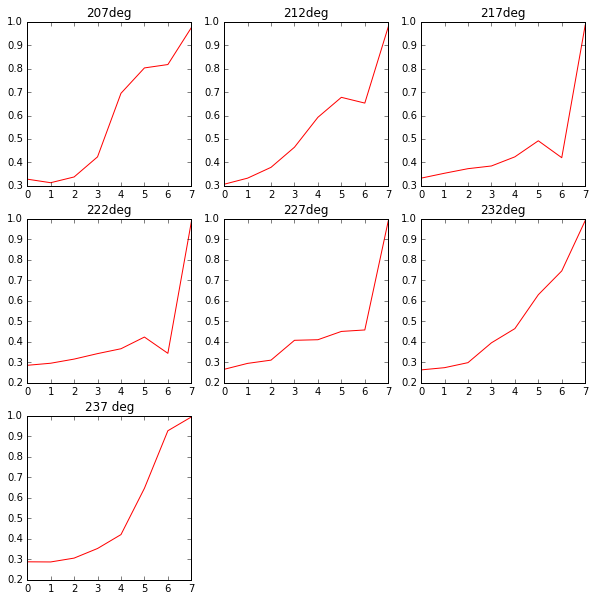

In [15]:
# Comparison with other stuff
df222 = pd.read_csv('../data/LillgrundEfficiency/Meas-Kurt/neutral_222.dat', sep='\t')
print df222
ws = 9.0
plt.figure(figsize=(10,10))
for i, sd in enumerate(df222.keys()):
    plt.subplot(3,3,i+1)
    plt.plot(df222[sd][::-1]/WT.get_P(WS), color='red')
    plt.title(str(sd)+'deg')


No annotation of turbines


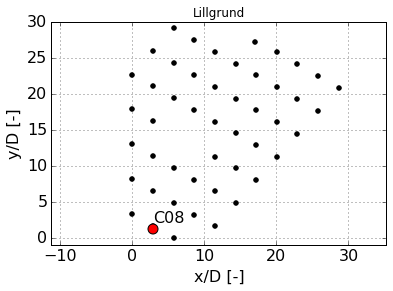

In [16]:
# print ID_wake
plt.figure(figsize=(25, 25))
fig,ax=WF.plot(WT_num=False)
fig.hold('True')
ax.scatter(2.85,1.15,c='red',s=100)
plt.text(2.85,2.15,'C08',fontsize=16)
# plt.xlim((0,360))
plt.ylim((-1,30))
plt.xlim((-1,25))
plt.xlabel('x/D [-]',fontsize=16)
plt.ylabel('y/D [-]',fontsize=16)
plt.tick_params(axis='both',labelsize=16)
plt.grid('on')
# plt.savefig('Figs/C08sketch.png',bbox_inches='tight')
# plt.savefig('Figs/C08sketch.pdf',bbox_inches='tight')

/home/ewan/Work/PostDoc/DWMstandalone/sDWM-WFC/venvDWMWFC/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


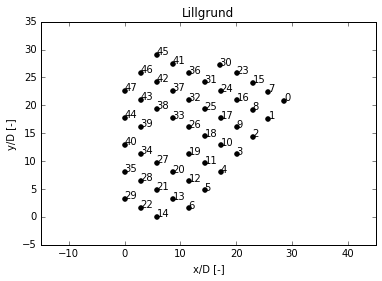

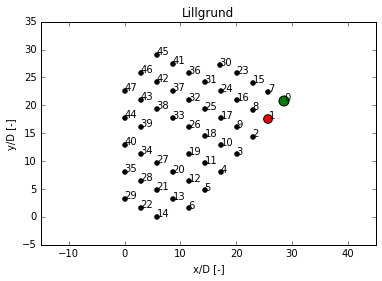

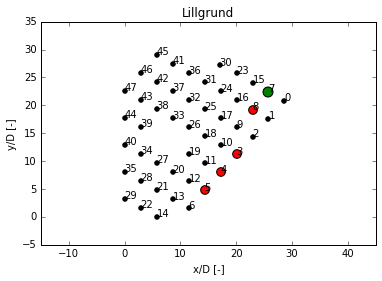

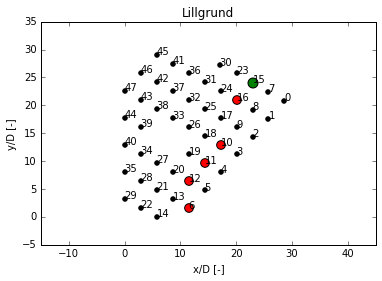

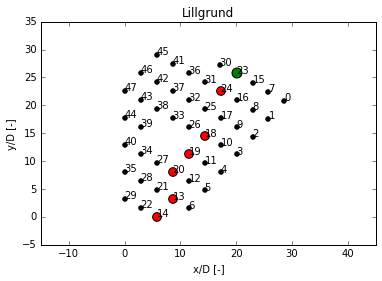

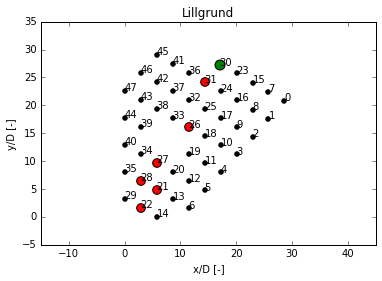

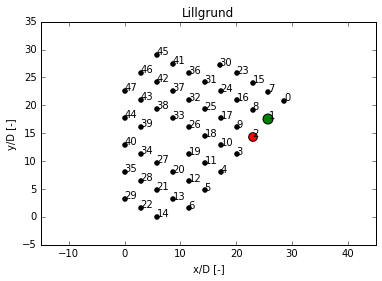

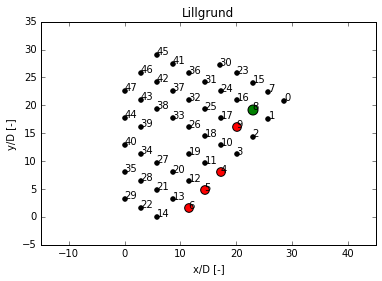

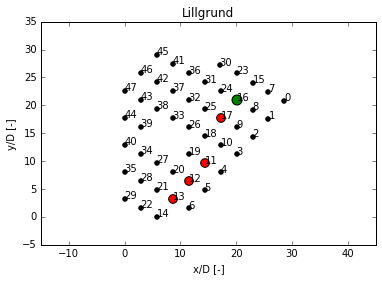

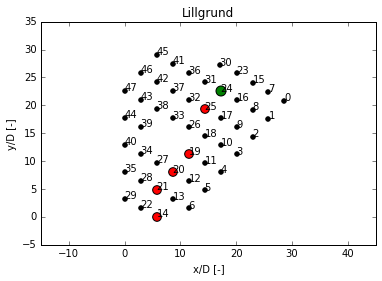

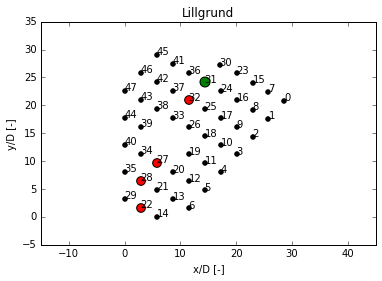

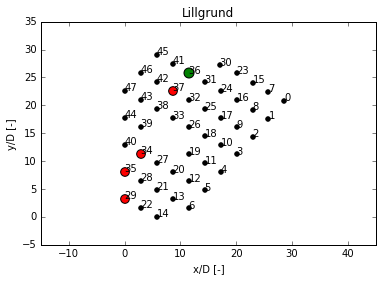

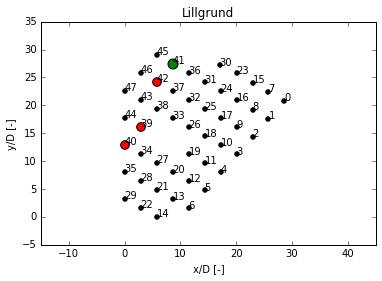

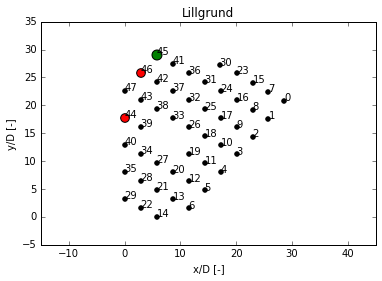

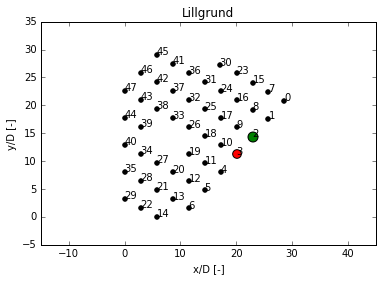

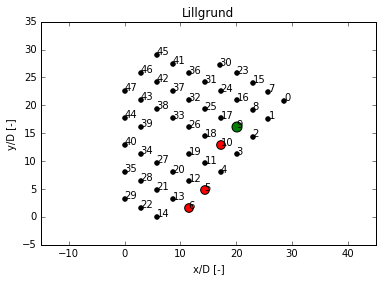

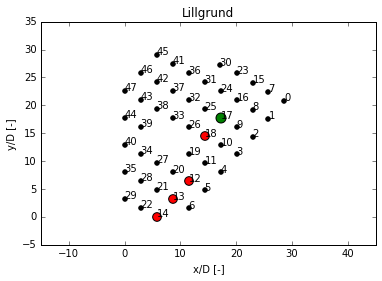

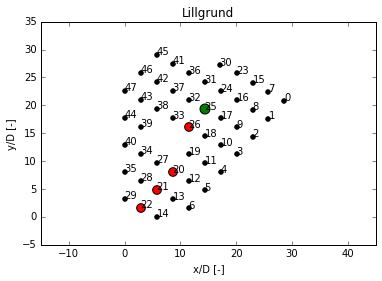

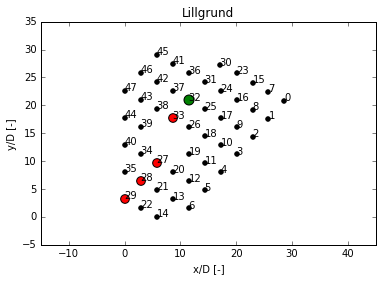

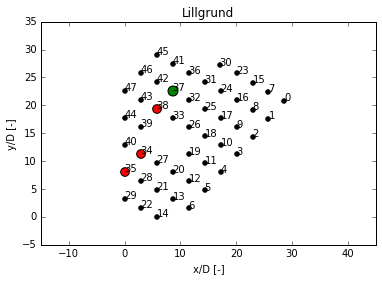

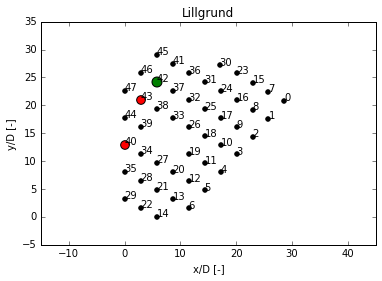

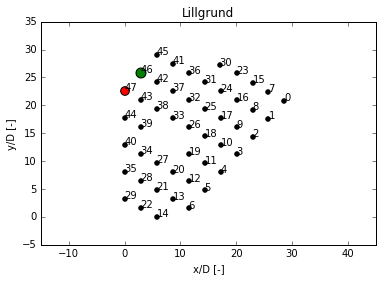

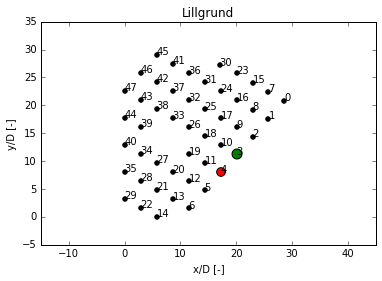

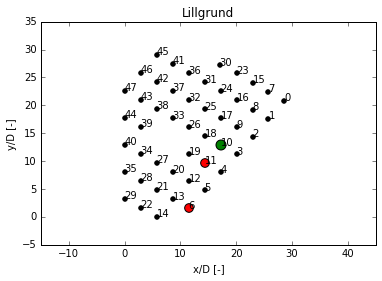

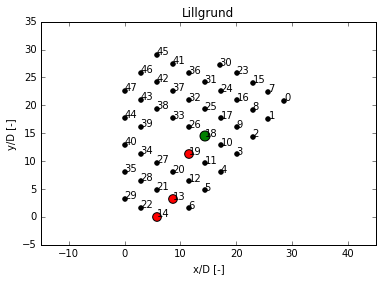

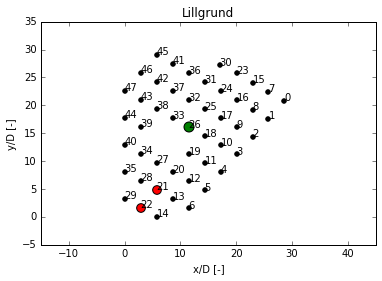

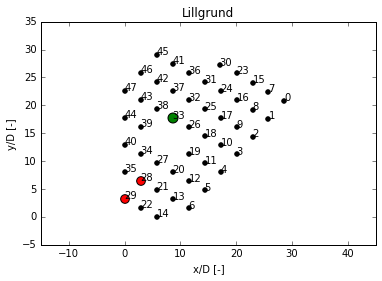

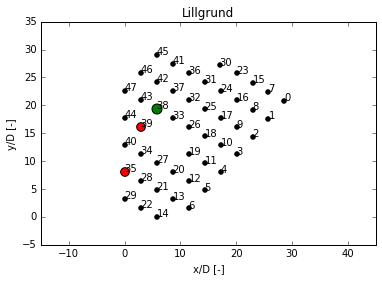

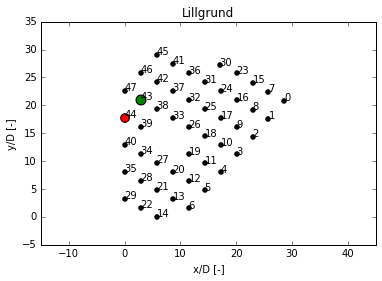

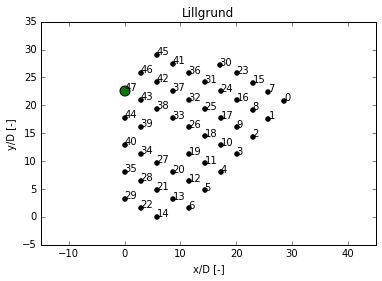

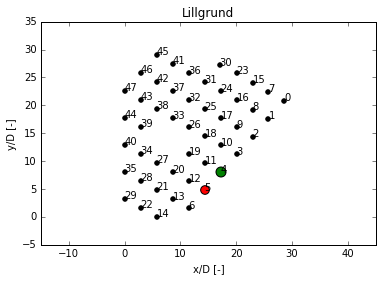

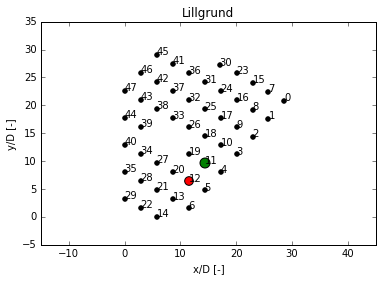

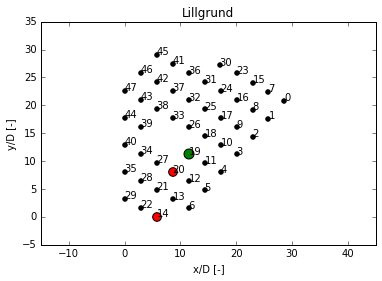

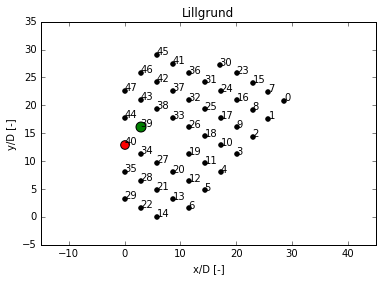

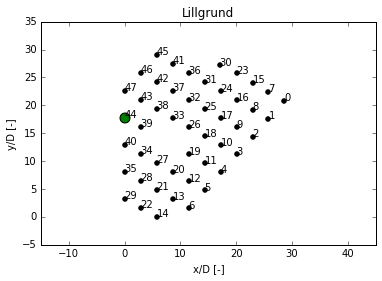

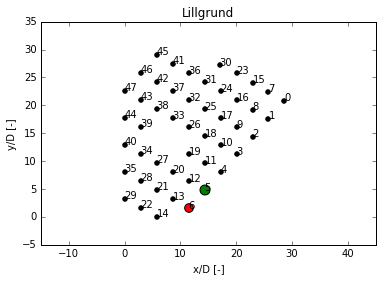

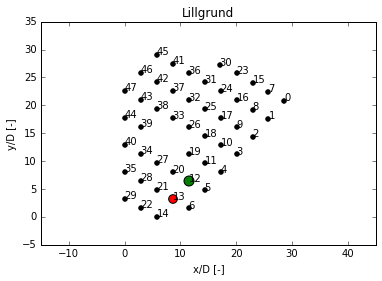

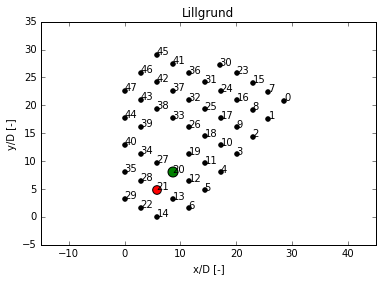

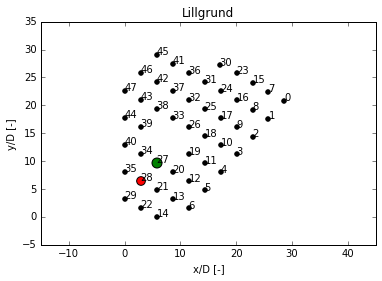

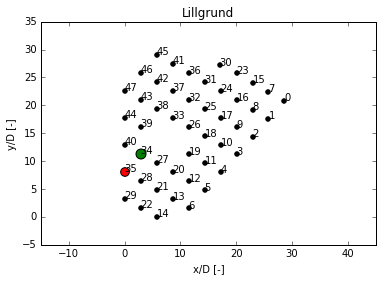

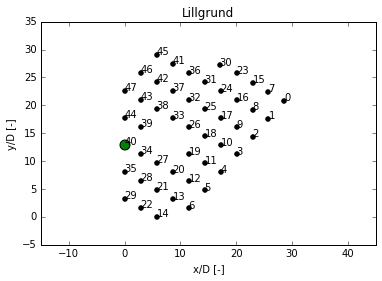

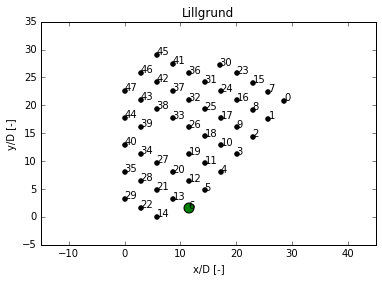

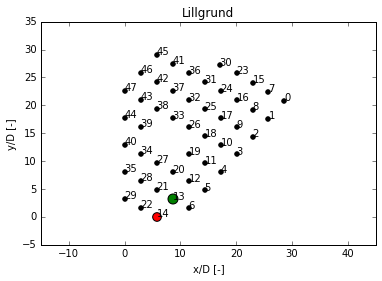

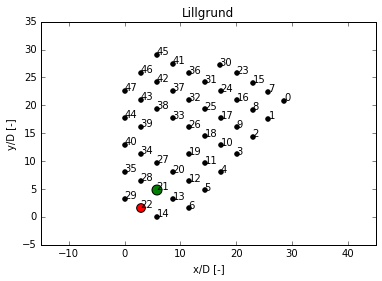

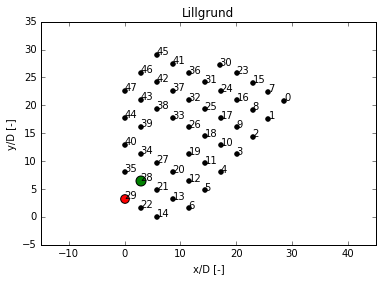

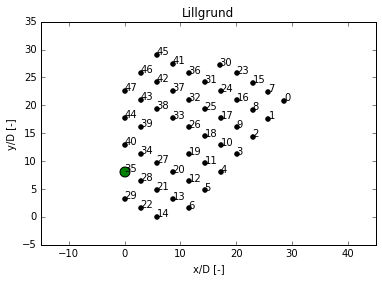

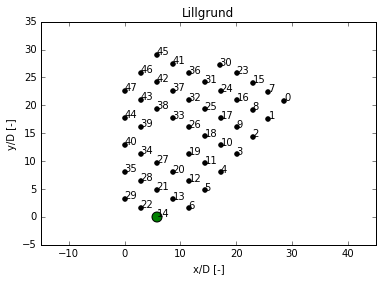

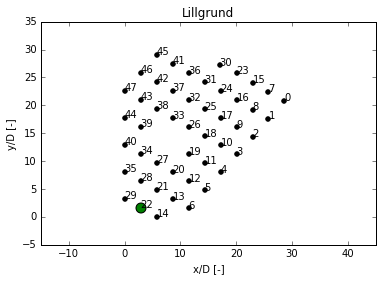

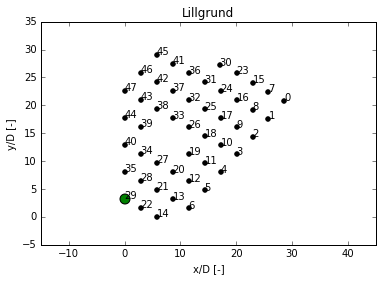

In [17]:
## Animation
WD=30.0
WS=9.0
TI=0.06

pars=[0.435449861,0.797853685,-0.124807893,0.136821858,15.6298,1.0]
distFlowCoord, nDownstream, id0= WF.turbineDistance(WD)

# Extreme wake to define WT's in each wake, including partial wakes
ID_wake = {id0[i]:(get_Rw(x=distFlowCoord[0,id0[i],:],\
                          R=WF.WT.R,TI=TI,CT=WT.get_CT(WS),pars=pars)>\
           np.abs(distFlowCoord[1,id0[i],:])).nonzero()[0] \
           for i in range(WF.nWT)}

# print ID_wake
fig,ax=WF.plot(WT_num=True)
fig.hold('True')
# plt.savefig('Figs/lillgrundlayout.png')

for i in range(WF.nWT):
# for i in range(1):
    cWT = id0[i]
    
    #Radial coordinates in cWT for wake affected WT's
    x=distFlowCoord[0,cWT,ID_wake[cWT]]
    C2C   = distFlowCoord[1,cWT,ID_wake[cWT]]

    index_orig=np.argsort(x)
    x=np.sort(x)
    row= ID_wake[id0[i]][index_orig]
    C2C=C2C[index_orig]
#     print x[0]
#     plt.figure(figsize=(20, 20))
    fig,ax=WF.plot(WT_num=True)
    fig.hold('True')
    xx = (WF.pos[0,row]-min(WF.pos[0,:]))/(2.*WF.WT.R)
    yy = (WF.pos[1,row]-min(WF.pos[1,:]))/(2.*WF.WT.R)
    ax.scatter(xx,yy,c='red',s=75)
    ax.scatter(xx[0],yy[0],c='green',s=100)
#     ax.autoscale(enable=True, axis=u'both', tight=None)
#     fig.set_size_inches(18.5, 10.5)
#     plt.savefig('Figs/lillgrundloop'+str(i).zfill(2)+'.png')


In [18]:
ID_wake


{0: array([0, 1]),
 1: array([1, 2]),
 2: array([2, 3]),
 3: array([3, 4]),
 4: array([4, 5]),
 5: array([5, 6]),
 6: array([6]),
 7: array([3, 4, 5, 7, 8]),
 8: array([4, 5, 6, 8, 9]),
 9: array([ 5,  6,  9, 10]),
 10: array([ 6, 10, 11]),
 11: array([11, 12]),
 12: array([12, 13]),
 13: array([13, 14]),
 14: array([14]),
 15: array([ 6, 10, 11, 12, 15, 16]),
 16: array([11, 12, 13, 16, 17]),
 17: array([12, 13, 14, 17, 18]),
 18: array([13, 14, 18, 19]),
 19: array([14, 19, 20]),
 20: array([20, 21]),
 21: array([21, 22]),
 22: array([22]),
 23: array([13, 14, 18, 19, 20, 23, 24]),
 24: array([14, 19, 20, 21, 24, 25]),
 25: array([20, 21, 22, 25, 26]),
 26: array([21, 22, 26]),
 27: array([27, 28]),
 28: array([28, 29]),
 29: array([29]),
 30: array([21, 22, 26, 27, 28, 30, 31]),
 31: array([22, 27, 28, 31, 32]),
 32: array([27, 28, 29, 32, 33]),
 33: array([28, 29, 33]),
 34: array([34, 35]),
 35: array([35]),
 36: array([29, 34, 35, 36, 37]),
 37: array([34, 35, 37, 38]),
 38: arra

In [19]:
C2C

array([ 0.])

In [20]:
row

array([29])

In [21]:
x

array([ 0.])